# 1 - Representativeness of the Collected Data - Lecture

The students had the possibility to decide if their actions in ILIAS should be tracked anonymously or with pseudonyms. A decision for pseudonyms would imply that the events in the data set (produced by the actions taken in ILIAS) can be connected to one person respectively ID as I don't know (due to privacy protection issues) which ID belongs to which "real life" person. As "anonymous" was actually the default option, only 10.7% of the students changed this setting to "pseudonymous". One aspect of the following report will therefore be: Is the data and the collected behaviour of the pseudonymous students representative for the whole course? Later on this will facilitate to generalise our findings for the whole course. 

**ideas for creating TIME variables**

+ time difference
+ point of time / day / week
    + weekend y/n
    + morning / noon / afternoon / night
+ time left until exam

**ideas for creating FILE variables**

+ distribution over file types
+ distribution over files?

In [1]:
import pandas as pd
import re 
import numpy as np
from dateutil import parser
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [2]:
results = pd.read_csv('events-and-resources.csv', delimiter=";", encoding="utf-8")
#results.head()

## date parsing and attribute creation

In [3]:
def parsing_with_sec(date_str):
    parsed = datetime.strptime(date_str, "%d.%m.%Y %H:%M:%S")
    return parsed
def parsing_without_sec(date_str):
    parsed = datetime.strptime(date_str, "%d.%m.%Y %H:%M")
    return parsed

**new variables:**
+ time difference between uploading the files and the events generated by the students
+ time difference between the events and first and second exam date

In [4]:
results["timestamp"] = results["timestamp"].apply(parsing_without_sec)
results["createDate"] = results["createDate"].apply(parsing_without_sec)

results["time_diff"] = results["timestamp"] - results["createDate"]

In [5]:
exam1 = datetime.strptime("2017-12-12 17:00", "%Y-%m-%d %H:%M")
results["time_to_exam1"] = exam1 - results["timestamp"]
exam2 = datetime.strptime("2018-02-07 15:00", "%Y-%m-%d %H:%M")
results["time_to_exam2"] = exam2 - results["timestamp"]

**also generated:**

+ at what day of the week did the event took place?
+ and at which hour?
+ what was ne number of th week, when the event happened?

In [6]:
def weekdaynumber(date):
    return date.weekday()

results["weekday"] = results["timestamp"].apply(weekdaynumber) + 1    

In [7]:
def part_of_day(date):
    return date.hour

results["part_of_day"] = results["timestamp"].apply(part_of_day)

In [8]:
def weeknumber(date):
    return date.isocalendar()[1]

results["weeknumber"] = results["timestamp"].apply(weeknumber)

To compare the two different student groups (anonymised, pseudonymised), I generated, on the one hand, a variable containing the student status, and on the other hand I splitted the "results" frame in two independent frames, containing only pseudonym student event data and anonym student data, respectively.

In [9]:
results["status"] = np.where(results["student_id"] == 2, 'anonym', 'pseudonym')

In [10]:
pseudonym = results[results['student_id'] != 2]
anonym = results[results['student_id'] == 2]

In [11]:
pseudonym.describe()

,Unnamed: 0,event_id,student_id,resource_id,leapId,numberOfEvents,time_diff,time_to_exam1,time_to_exam2,weekday,part_of_day,weeknumber
count,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373,3373,3373,3373.000000,3373.000000,3373.000000
mean,17144.391047,76265.713015,285.538097,131.467833,131.467833,5042.980136,37 days 15:53:54.201008,36 days 06:45:03.806700,93 days 04:45:03.806700,3.495998,15.026682,41.713608
std,9565.492258,40689.167497,101.042819,165.858366,165.858366,5018.516597,31 days 20:39:11.309959,31 days 08:17:12.545526,31 days 08:17:12.545526,1.831191,5.024129,10.267989
min,108.000000,526.000000,40.000000,37.000000,37.000000,1.000000,0 days 00:00:00,-42 days +20:15:00,15 days 18:15:00,1.000000,0.000000,1.000000
25%,8814.000000,42460.000000,246.000000,37.000000,37.000000,399.000000,8 days 22:38:00,11 days 23:51:00,68 days 21:51:00,2.000000,13.000000,40.000000
50%,17620.000000,78226.000000,299.000000,41.000000,41.000000,2802.000000,30 days 00:05:00,37 days 02:02:00,94 days 00:02:00,3.000000,16.000000,43.000000
75%,24934.000000,109721.000000,349.000000,85.000000,85.000000,11460.000000,61 days 03:03:00,63 days 00:07:00,119 days 22:07:00,5.000000,18.000000,47.000000
max,33631.000000,143458.000000,407.000000,625.000000,625.000000,11460.000000,125 days 03:05:00,83 days 22:19:00,140 days 20:19:00,7.000000,23.000000,52.000000


In [12]:
anonym.describe()

,Unnamed: 0,event_id,student_id,resource_id,leapId,numberOfEvents,time_diff,time_to_exam1,time_to_exam2,weekday,part_of_day,weeknumber
count,30500.000000,30500.000000,30500.0,30500.000000,30500.000000,30500.000000,30500,30500,30500,30500.000000,30500.000000,30500.000000
mean,16912.954000,75224.599770,2.0,137.150951,137.150951,4809.953180,36 days 06:42:16.646557,37 days 04:40:44.964590,94 days 02:40:44.964590,3.787672,14.851377,41.898885
std,9801.584396,41890.761055,0.0,168.570634,168.570634,4897.527909,31 days 05:29:17.290803,31 days 09:47:48.358543,31 days 09:47:48.358543,1.972157,5.122223,9.748293
min,0.000000,283.000000,2.0,35.000000,35.000000,1.000000,-1 days +22:13:00,-45 days +01:03:00,11 days 23:03:00,1.000000,0.000000,1.000000
25%,8401.750000,40088.500000,2.0,37.000000,37.000000,375.000000,7 days 22:38:15,10 days 23:03:30,67 days 21:03:30,2.000000,12.000000,40.000000
50%,16858.500000,75958.500000,2.0,42.000000,42.000000,2802.000000,28 days 03:16:00,39 days 17:30:00,96 days 15:30:00,4.000000,15.000000,43.000000
75%,25443.250000,111564.250000,2.0,189.000000,189.000000,11460.000000,60 days 22:44:00,64 days 00:51:00,120 days 22:51:00,5.000000,18.000000,48.000000
max,33872.000000,145325.000000,2.0,625.000000,625.000000,11460.000000,128 days 22:17:00,84 days 00:42:00,140 days 22:42:00,7.000000,23.000000,52.000000


## visualizing event date differences

In [13]:
def to_seconds(delta):
    return delta.total_seconds()

### comparison: accessing the files relative to their creation date

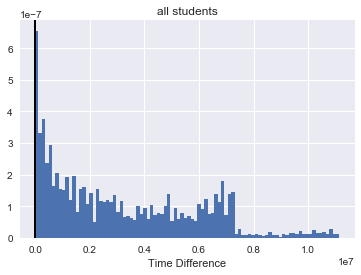

In [14]:
plt.hist(results["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time Difference")

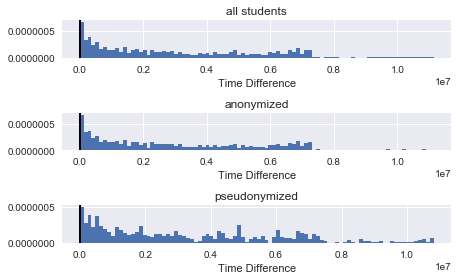

In [15]:
plt.subplot(311)
plt.hist(results["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time Difference")

plt.subplot(312)
plt.hist(anonym["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("anonymized")
plt.xlabel("Time Difference")

plt.subplot(313)
plt.hist(pseudonym["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("pseudonymized")
plt.xlabel("Time Difference")
plt.tight_layout()

In [16]:
mannwhitneyu(anonym["time_diff"].apply(to_seconds), pseudonym["time_diff"].apply(to_seconds), alternative='two-sided')

MannwhitneyuResult(statistic=49974422.5, pvalue=0.0066001956513274439)

In [17]:
ttest_ind(anonym["time_diff"].apply(to_seconds), pseudonym["time_diff"].apply(to_seconds), equal_var=False)

Ttest_indResult(statistic=-2.39703368984891, pvalue=0.016572668542309429)

### comparison: accessing the files relative to the first exam date

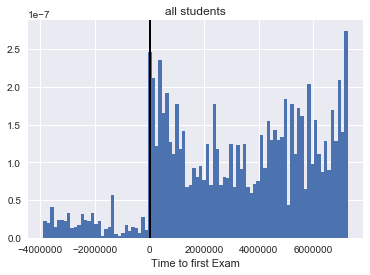

In [18]:
plt.hist(results["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time to first Exam")

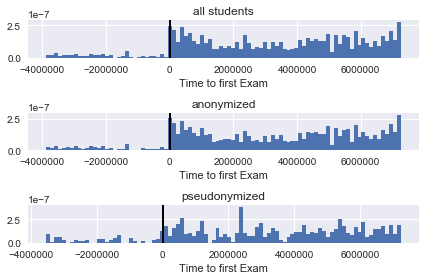

In [19]:
plt.subplot(311)
plt.hist(results["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time to first Exam")

plt.subplot(312)
plt.hist(anonym["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("anonymized")
plt.xlabel("Time to first Exam")

plt.subplot(313)
plt.hist(pseudonym["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("pseudonymized")
plt.xlabel("Time to first Exam")
plt.tight_layout()

In [20]:
mannwhitneyu(anonym["time_to_exam1"].apply(to_seconds), pseudonym["time_to_exam1"].apply(to_seconds), alternative='two-sided')

MannwhitneyuResult(statistic=52146084.0, pvalue=0.18901418506775425)

In [21]:
ttest_ind(anonym["time_to_exam1"].apply(to_seconds), pseudonym["time_to_exam1"].apply(to_seconds), equal_var=False)

Ttest_indResult(statistic=1.6060605986923098, pvalue=0.10833655426209679)

## visualizing weekday and part of day

### comparative distribution over days per week

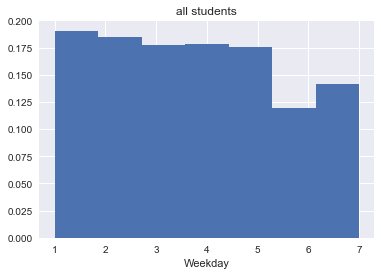

In [22]:
plt.hist(results["weekday"], normed=True, bins=7)
plt.title("all students")
plt.xlabel("Weekday")

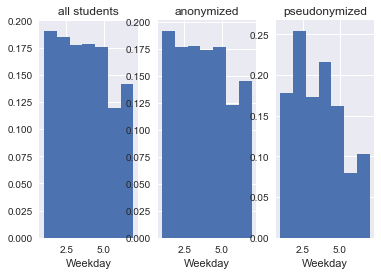

In [23]:
plt.subplot(131)
plt.hist(results["weekday"], normed=True, bins=7)
plt.title("all students")
plt.xlabel("Weekday")

plt.subplot(132)
plt.hist(anonym["weekday"], normed=True, bins=7)
plt.title("anonymized")
plt.xlabel("Weekday")

plt.subplot(133)
plt.hist(pseudonym["weekday"], normed=True, bins=7)
plt.title("pseudonymized")
plt.xlabel("Weekday")

In [24]:
mannwhitneyu(anonym["weekday"], pseudonym["weekday"], alternative='two-sided')

MannwhitneyuResult(statistic=55661815.5, pvalue=2.3042937887407062e-15)

In [25]:
ttest_ind(anonym["weekday"], pseudonym["weekday"], equal_var=False)

Ttest_indResult(statistic=8.7089546530632891, pvalue=4.3107932032912485e-18)

### comparative distribution over hour per day

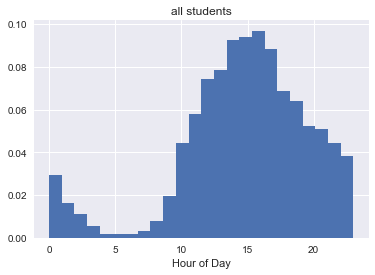

In [26]:
plt.hist(results["part_of_day"], normed=True, bins=24)
plt.title("all students")
plt.xlabel("Hour of Day")

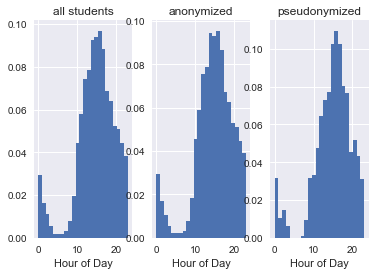

In [27]:
plt.subplot(131)
plt.hist(results["part_of_day"], normed=True, bins=24)
plt.title("all students")
plt.xlabel("Hour of Day")

plt.subplot(132)
plt.hist(anonym["part_of_day"], normed=True, bins=24)
plt.title("anonymized")
plt.xlabel("Hour of Day")

plt.subplot(133)
plt.hist(pseudonym["part_of_day"], normed=True, bins=24)
plt.title("pseudonymized")
plt.xlabel("Hour of Day")

In [28]:
mannwhitneyu(anonym["part_of_day"], pseudonym["part_of_day"], alternative='two-sided')

MannwhitneyuResult(statistic=49944312.5, pvalue=0.0054543630321868663)

In [29]:
ttest_ind(anonym["part_of_day"], pseudonym["part_of_day"], equal_var=False)

Ttest_indResult(statistic=-1.9191764204650881, pvalue=0.055029931297821792)

## different types of events

### accessing different data types over semester weeks

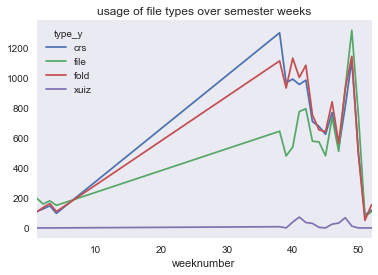

In [30]:
ct1 = pd.crosstab(index=results["weeknumber"], columns = results["type_y"])
ct1.plot(grid=False, title="usage of file types over semester weeks")

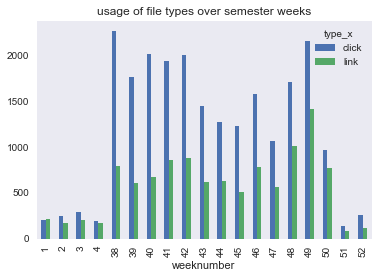

In [31]:
ct2 = pd.crosstab(index=results["weeknumber"], columns = results["type_x"])
ct2.plot(kind="bar", grid=False, title="usage of file types over semester weeks")

### comparison: usage of different data types splitted by student status

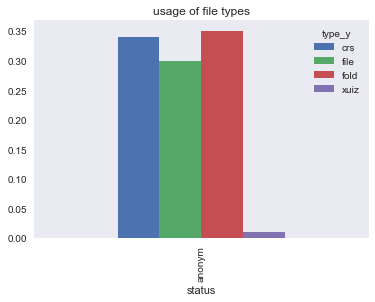

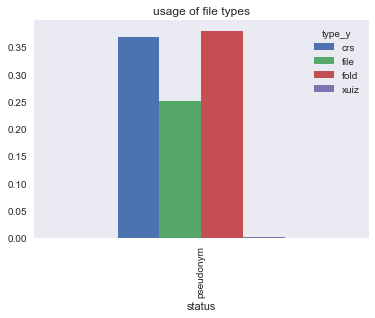

In [32]:
ct3 = pd.crosstab(index=anonym["status"], columns = results["type_y"], normalize=True)
ct3.plot(kind='bar', grid=False, title="usage of file types")

ct4 = pd.crosstab(index=pseudonym["status"], columns = results["type_y"], normalize=True)
ct4.plot(kind='bar', grid=False, title="usage of file types")